In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard2023.csv')

In [3]:
data.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
print(data.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [5]:
X, y = data.iloc[:,1:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
y_test

391259    1
239375    0
442757    1
207881    0
222701    0
         ..
496981    1
157092    0
65443     0
316860    1
354568    1
Name: Class, Length: 113726, dtype: int64

In [7]:
len(X_train)

454904

In [8]:
np.shape(data)

(568630, 31)

In [9]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [10]:
print(X.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -0.214048   
4 -0.212660  1.049921  0.968046  ...  0.247237 -0.106984  0.729727 -0.161666   

        V24       V25       V26       V27       V28    Amount  
0  0

In [11]:
np.shape(X_train)

(454904, 29)

In [12]:
np.shape(X_test)

(113726, 29)

In [13]:
np.shape(y_train)

(454904,)

In [14]:
np.shape(y_test)

(113726,)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
selected_columns = ['V1', 'V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
# Fit and transform the data
X_scaled = pd.DataFrame(
    scaler.fit_transform(data[selected_columns]),
    columns = selected_columns )

# Perform preliminary PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pd.DataFrame(
    pca.fit_transform(X_scaled),
    columns=[f'PC{i + 1}' for i in range(X_scaled.shape[1])]
)

# Choose number of components based on eigenvalues threshold of 1
num_components = np.argmax(pca.explained_variance_ < 1)
assert num_components > 0, 'Number of components must be > 0'

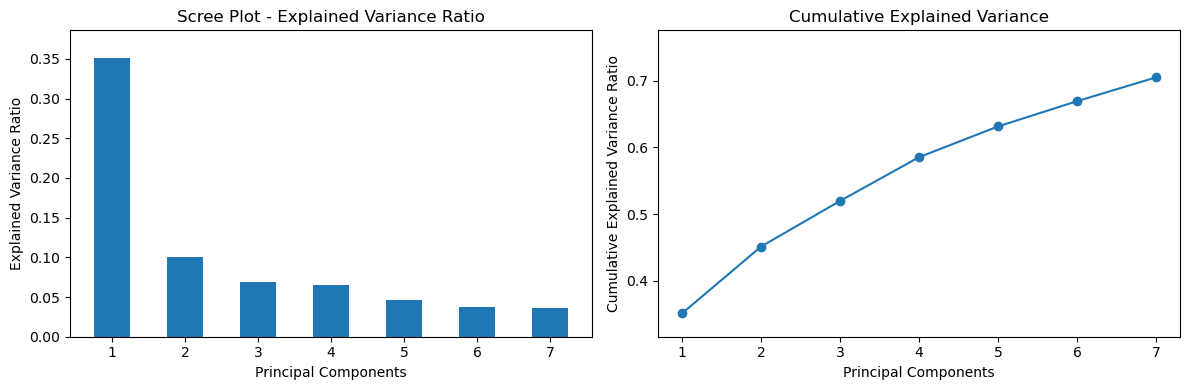

In [41]:
# Visualize scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

# Explained Variance Ratio for Each Principal Component
ax1.bar(
    x=range(1, len(pca.explained_variance_ratio_[:num_components]) + 1),
    height=pca.explained_variance_ratio_[:num_components],
    width=0.5,
)
# Set axes properties
ax1.set_ylim(0.0, pca.explained_variance_ratio_[0] * 1.1)
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance Ratio')

# Cumulative explained variance ratio plot
ax2.plot(
    range(1, len(pca.explained_variance_ratio_[:num_components]) + 1),
    np.cumsum(pca.explained_variance_ratio_[:num_components]),
    'o-'
)
# Set axes properties
ax2.set_ylim(
    bottom=pca.explained_variance_ratio_[0] * 0.9,
    top=np.cumsum(pca.explained_variance_ratio_[:num_components])[-1] * 1.1
)
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')

# Display the plots
plt.show()

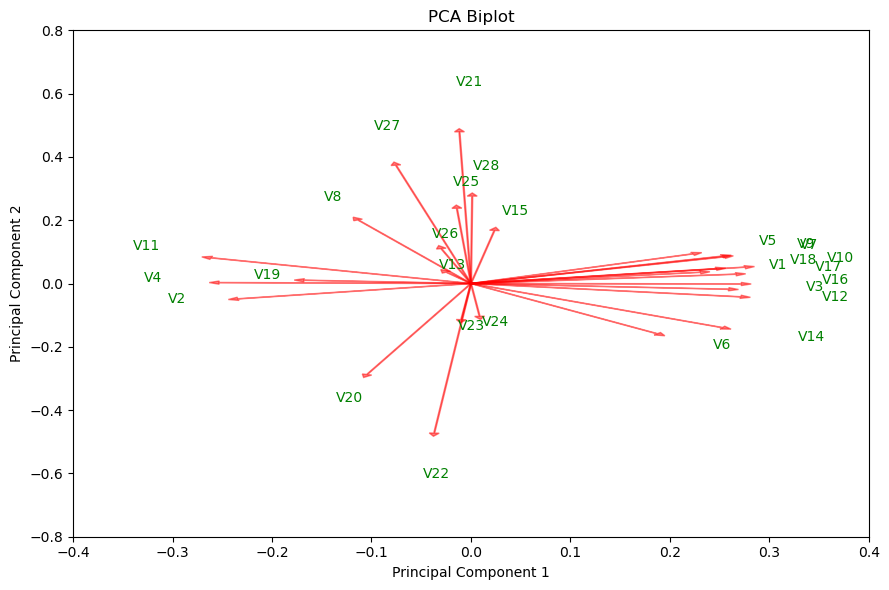

In [42]:
# Visualize PCA biplot
fig, ax1 = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

# Iterate over features to plot arrows and labels on the biplot
for i, feature in enumerate(selected_columns):
    # Plot arrows representing feature contributions to PC1 and PC2
    ax1.arrow(
        x=0,
        y=0,
        dx=pca.components_[0, i],
        dy=pca.components_[1, i],
        color='r',
        alpha=0.5,
        head_width=0.01,
        head_length=0.01,
    )
    # Annotate each arrow with the corresponding feature name
    ax1.text(
        pca.components_[0, i] * 1.3,
        pca.components_[1, i] * 1.3,
        feature,
        color='g'
    )
# Set axes properties
ax1.set_xlim(-0.4, 0.4)
ax1.set_ylim(-0.8, 0.8)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA Biplot')

# Display the biplot
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler    #Importing StandardScaler using sklearn library

from sklearn.model_selection import train_test_split   #To split the data in training and testing part  

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay  #To generate classification report and acuracy score
x = data.drop(['id','Class'],axis=1)
y = data.Class

In [45]:
# Standardize the feature data (x)   
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)

[[-0.2606478  -0.46964845  2.49626608 ... -0.08123011 -0.15104549
   0.85844694]
 [ 0.98509973 -0.35604509  0.55805635 ... -0.24805206 -0.06451192
  -0.79636931]
 [-0.26027161 -0.94938461  1.72853778 ... -0.30025804 -0.24471823
  -1.37701093]
 ...
 [-0.31199739 -0.00409479  0.13752559 ... -0.48753975 -0.26874127
   1.66640101]
 [ 0.63687054 -0.51696952 -0.30088853 ... -0.15926926 -0.07625057
  -0.27185346]
 [-0.79514417  0.43323608 -0.64914005 ... -1.5751126   0.7229365
   1.3659619 ]]


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
x = data.drop(['id','Class'],axis=1)
y = data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [49]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred_reg =  reg.predict(X_test)

In [50]:
print("Logistic Regression Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_reg))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_reg)*100,"%")

Logistic Regression Model
Confusion Matrix:
 [[55593  1270]
 [ 2715 54148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726


Accuracy Score: 96.49596398360973 %


In [51]:
Logistic_Regression = accuracy_score(y_test, y_pred_reg)*100

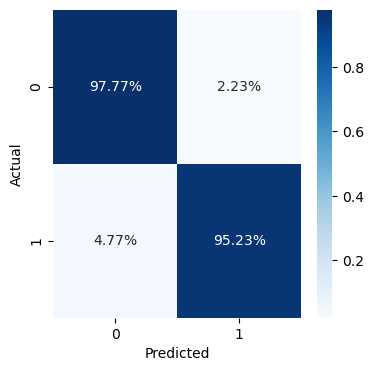

In [52]:
cm = confusion_matrix(y_test, y_pred_reg)
cm_1 = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

fig, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm_1, annot = True, fmt = '.2%', cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block = False)

F1 Score: 0.9645086880237975


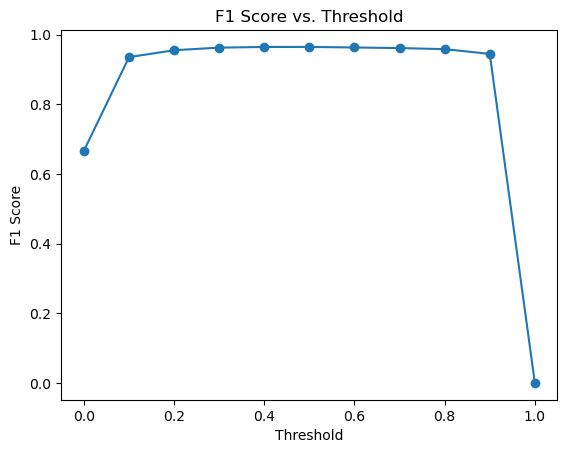

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Compute the F1 score 
f1 = f1_score(y_test, y_pred_reg)

print("F1 Score:", f1)

# Plot the diagram for F1 score
thresholds = np.arange(0, 1.1, 0.1)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (reg.predict_proba(X_test)[:, 1] > threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

plt.plot(thresholds, f1_scores, marker='o')
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

## XGBoost

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [16]:
model = XGBClassifier(use_label_encoder=False)

In [17]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [18]:
y_pred_prob

array([[6.7591667e-05, 9.9993241e-01],
       [9.9998885e-01, 1.1141555e-05],
       [5.3644180e-06, 9.9999464e-01],
       ...,
       [9.9998945e-01, 1.0521391e-05],
       [5.8501959e-03, 9.9414980e-01],
       [1.9550323e-05, 9.9998045e-01]], dtype=float32)

In [19]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


In [20]:
xgb = XGBClassifier()

In [21]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred_xgb = xgb.predict(X_test)

In [23]:
y_test

391259    1
239375    0
442757    1
207881    0
222701    0
         ..
496981    1
157092    0
65443     0
316860    1
354568    1
Name: Class, Length: 113726, dtype: int64

In [24]:
y_test

391259    1
239375    0
442757    1
207881    0
222701    0
         ..
496981    1
157092    0
65443     0
316860    1
354568    1
Name: Class, Length: 113726, dtype: int64

In [25]:
cm_1 = confusion_matrix(y_test, y_pred_xgb)

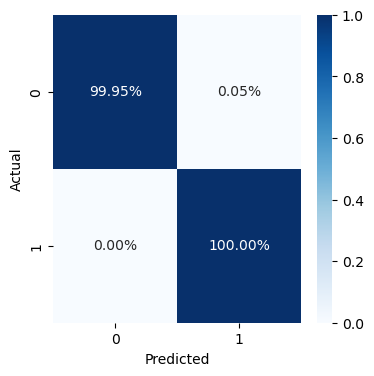

In [26]:
cmn_1 = cm_1.astype('float') / cm_1.sum(axis = 1)[:, np.newaxis]

fig, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cmn_1, annot = True, fmt = '.2%', cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block = False)

F1 Score: 0.9997530777099721


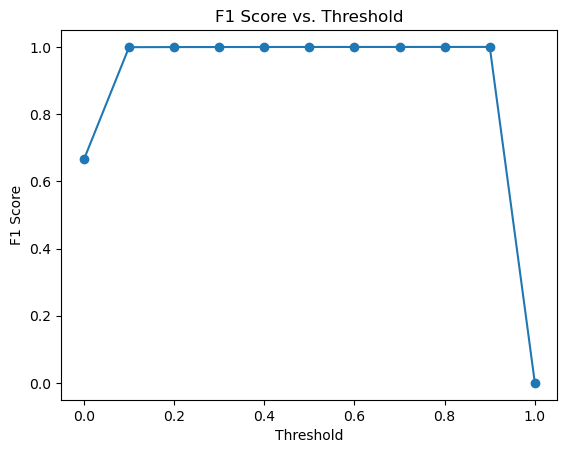

In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

thresholds = np.arange(0, 1.1, 0.1)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

plt.plot(thresholds, f1_scores, marker='o')
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

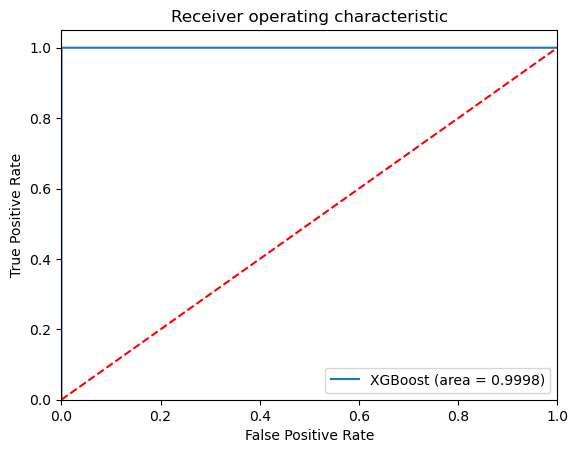

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

xg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'XGBoost (area = %.4f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('XGBoost_ROC')
plt.show()

## Probit Model

In [29]:
import statsmodels.api as smf

probit = smf.Probit(y_train,X_train)
model = probit.fit(maxiter = 300)
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.120872
         Iterations 21
                          Probit Regression Results                           
Dep. Variable:                  Class   No. Observations:               454904
Model:                         Probit   Df Residuals:                   454875
Method:                           MLE   Df Model:                           28
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.8256
Time:                        23:55:49   Log-Likelihood:                -54985.
converged:                       True   LL-Null:                   -3.1532e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -0.2356      0.007    -33.906      0.000      -0.249      -0.222
V2             0.0445      0

In [30]:
params = probit.fit(maxiter = 300).params
columns = data.columns

Optimization terminated successfully.
         Current function value: 0.120872
         Iterations 21


In [31]:
result = X_test
y_pred = 0
for i in range(1,29):
    y_pred += result[columns[i]] * params[i-1]

In [32]:
import scipy.stats as si
def normsdist(z):
    z = si.norm.cdf(z,0.0,1.0)
    return (z)
normsdist(1.645)

0.9500150944608786

In [33]:
result['y_pred_Probit'] = normsdist(y_pred)
result.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,y_pred_Probit
391259,-0.294141,-1.756633,-0.840973,0.515810,-0.194092,-0.405241,0.617607,-0.194444,-0.032957,-0.543476,...,0.371570,-0.632867,-1.409038,-0.858754,-0.048207,0.469207,-0.037498,1.018925,17670.63,0.997762
239375,-0.637828,-1.354545,1.528161,0.601109,1.481741,-0.029150,0.446319,-0.211298,0.198844,1.301743,...,-0.186240,1.391798,2.825410,0.112788,-0.633866,-0.082131,0.507180,-1.131067,10236.89,0.134658
442757,-0.642033,0.888235,-0.430254,1.117410,-0.344999,1.510032,-1.069684,-2.050732,-0.752211,-0.751167,...,-2.378811,2.087761,0.848659,-0.720727,-0.990289,0.899768,-0.176731,0.324994,3078.88,0.999986
207881,-0.314319,-0.057786,1.128189,-1.177282,-0.017348,0.855428,-0.081618,-1.145372,-0.271132,0.184871,...,-1.600205,-1.064675,0.385573,2.129651,-0.196764,-1.857186,-0.211674,0.249742,12744.81,0.000075
222701,-0.531757,0.190689,0.397190,-0.951116,-0.232963,0.060028,0.115898,0.291665,0.683883,0.365504,...,0.009066,0.669685,-0.134110,0.091898,0.195011,1.362976,-0.046320,0.169828,20597.63,0.000032


In [34]:
d = {'y_pred_proba': result['y_pred_Probit']}
df23 = pd.DataFrame(data = d)
df23 = df23.reset_index()
df23.drop(['index'], axis = 1, inplace = True)
df23['y_pred'] = 0.000
for i in range(0,len(df23['y_pred_proba'])):
    if df23['y_pred_proba'][i] > 0.500:
        df23['y_pred'][i] = 1.000
    else: 
        df23['y_pred'][i] = 0.000
y_pred = np.array(df23['y_pred'])
y_pred = y_pred.astype('int64')
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [35]:
y_pred_proba = np.array(df23['y_pred_proba'])

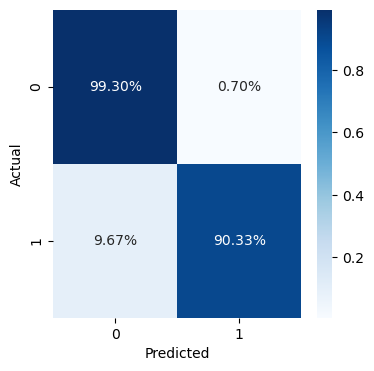

In [36]:
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred)

cmn_2 = cm_2.astype('float') / cm_2.sum(axis = 1)[:, np.newaxis]

fig, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cmn_2, annot = True, fmt = '.2%', cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block = False)

In [37]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.83%


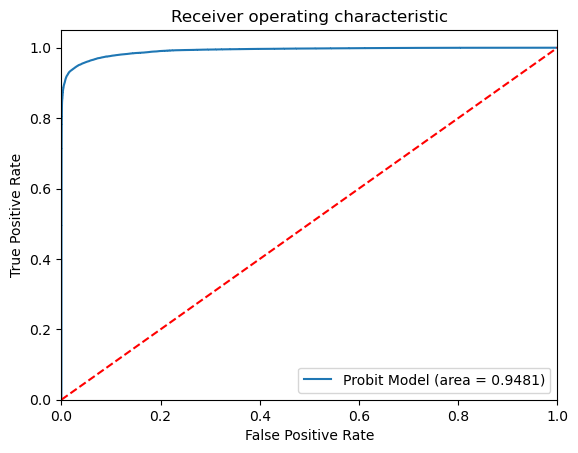

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label = 'Probit Model (area = %.4f)' % probit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Probit_ROC')
plt.show()